In [5]:
# Sourced from: https://www.python-engineer.com/courses/pytorchbeginner/13-feedforward-neural-network/

In [19]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import math

In [14]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [28]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

# TODO adjust these as per the configuration in the paper.
# Especially how learning rate changes


In [29]:
# TYPICAL PIPELINE

# 1) LOAD DATA
# 2) DESIGN MODEL
# 3) LOSS AND OPTIMIZER
# 4) TRAINING LOOP
#        - FORWARD PASS: computer prediction and calculate error
#        - BACKWARD PASS: calculate gradients
#        - UPDATE WEIGHTS
#        - SET ZERO GRAD IF USING AUTOGRAD

# 5) TEST MODEL WITH TEST DATA


In [30]:
# 1) LOAD DATA

# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

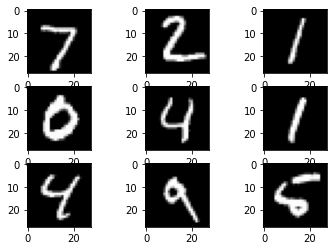

In [31]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = examples.next()

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [32]:
# 2) DESIGN MODEL

# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [38]:
# 3) LOSS AND OPTIMIZER

# TODO: Use the custom loss function in th paper. Equation [12]. It seems to use one-hot encoded labels.
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
print(optimizer.param_groups)

# TODO: To dynamically change learning rate
for param_group in optimizer.param_groups:
    print("param_group[lr]:", param_group['lr'])
#    param_group['lr'] = lr

[{'params': [Parameter containing:
tensor([[-0.0197, -0.0123, -0.0070,  ..., -0.0202, -0.0257,  0.0214],
        [ 0.0118, -0.0146,  0.0015,  ...,  0.0022,  0.0126, -0.0139],
        [-0.0330,  0.0198,  0.0221,  ...,  0.0321, -0.0101, -0.0253],
        ...,
        [ 0.0260,  0.0050, -0.0334,  ..., -0.0026,  0.0156, -0.0024],
        [-0.0256,  0.0136, -0.0142,  ..., -0.0225,  0.0327,  0.0052],
        [ 0.0095,  0.0133,  0.0155,  ..., -0.0197,  0.0152, -0.0184]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([-5.5201e-02, -1.1299e-01, -9.4846e-04,  4.9659e-03, -3.9064e-02,
         8.6962e-04, -2.9903e-02,  5.8541e-02, -6.0932e-02,  3.3331e-02,
        -5.5430e-03, -6.6972e-02, -2.9715e-02,  4.6596e-02,  7.8664e-02,
         3.5352e-02,  1.4029e-01, -1.3607e-01,  1.9067e-02, -9.9581e-02,
         3.1153e-02, -3.5494e-02, -5.2258e-02,  5.3352e-02,  7.5463e-02,
         6.2063e-02, -5.3495e-02,  7.0851e-03,  4.9428e-02,  4.2138e-02,
        -1.0374e-02,  2.76

In [34]:
# 4) TRAINING LOOP

# Train the model
n_total_steps = len(train_loader)
print(n_total_steps)

total_samples = len(train_dataset)
n_iterations = math.ceil(total_samples/batch_size)
print(total_samples, n_iterations)

'''
# Dummy training loop for printing 
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28)
        
        # here: 60000 samples, batch_size = 100, n_iters=60000/100 = 600 iterations
        # Run your training process
        if (i+1) % 5 == 0:
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {images.shape} | Labels {labels.shape}')
'''

# Real training loop
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # original shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')


600
60000 600
Epoch [1/10], Step [100/600], Loss: 0.3305
Epoch [1/10], Step [200/600], Loss: 0.2397
Epoch [1/10], Step [300/600], Loss: 0.2097
Epoch [1/10], Step [400/600], Loss: 0.1852
Epoch [1/10], Step [500/600], Loss: 0.1348
Epoch [1/10], Step [600/600], Loss: 0.1263
Epoch [2/10], Step [100/600], Loss: 0.1937
Epoch [2/10], Step [200/600], Loss: 0.1438
Epoch [2/10], Step [300/600], Loss: 0.0990
Epoch [2/10], Step [400/600], Loss: 0.0988
Epoch [2/10], Step [500/600], Loss: 0.0821
Epoch [2/10], Step [600/600], Loss: 0.0505
Epoch [3/10], Step [100/600], Loss: 0.0646
Epoch [3/10], Step [200/600], Loss: 0.0460
Epoch [3/10], Step [300/600], Loss: 0.0481
Epoch [3/10], Step [400/600], Loss: 0.0825
Epoch [3/10], Step [500/600], Loss: 0.0490
Epoch [3/10], Step [600/600], Loss: 0.0698
Epoch [4/10], Step [100/600], Loss: 0.0300
Epoch [4/10], Step [200/600], Loss: 0.0480
Epoch [4/10], Step [300/600], Loss: 0.0441
Epoch [4/10], Step [400/600], Loss: 0.0391
Epoch [4/10], Step [500/600], Loss: 0.06

In [35]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        # original shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 98.16 %


In [26]:
# LOG

for param in model.parameters():
  print(param.data)

tensor([[-0.0185, -0.0056, -0.0198,  ..., -0.0129,  0.0131,  0.0121],
        [-0.0241, -0.0077, -0.0349,  ...,  0.0166, -0.0203,  0.0127],
        [ 0.0145,  0.0254, -0.0091,  ...,  0.0296, -0.0350,  0.0060],
        ...,
        [ 0.0226,  0.0285,  0.0108,  ..., -0.0104,  0.0087, -0.0052],
        [ 0.0337,  0.0316,  0.0242,  ...,  0.0198,  0.0134, -0.0244],
        [-0.0282, -0.0347,  0.0333,  ..., -0.0329,  0.0075, -0.0300]],
       device='cuda:0')
tensor([-3.0137e-02,  6.7058e-02,  6.1550e-02,  3.0617e-02,  4.0048e-02,
         6.2598e-02,  1.7886e-02,  6.0559e-02,  4.0514e-02,  1.3575e-03,
        -1.9556e-02, -1.0787e-02, -6.8604e-02,  4.1330e-03, -6.7471e-02,
         5.0142e-02, -3.9239e-02,  4.9088e-02,  8.8427e-02,  1.9603e-02,
        -2.2908e-02,  5.1471e-02,  6.1619e-02, -2.9107e-02, -1.8113e-02,
        -8.1450e-03,  1.1806e-01,  5.1362e-02,  5.8259e-02, -9.2029e-03,
         7.2195e-02,  4.9407e-02,  7.3366e-02,  5.8667e-02, -1.0075e-02,
         4.9370e-02, -5.4041e-0